<a href="https://colab.research.google.com/github/EnzoGolfetti/praticas_python/blob/main/ECOO11_an_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uma análise do ETF ECOO11 da B3

---
Esse ETF replica o Índice Carbono Eficiente (ICO2) e é gerido pela BlackRock, a maior gestora de ativos do mundo.

A ideia do ETF é ao mesmo tempo que trás rentabilidade ao investir em empresas sólidas, melhora a eficiência de Carbono nos investimentos.

O Dataset utilizado aqui foi extraído do portal Yahoo Finance e contém dados históricos da variação deste ativo desde Junho/2012.


In [1]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Leitura e explorações iniciais do Dataset

In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/EnzoGolfetti/praticas_python/main/ECOO11sa_yahoo.csv', sep=';')

In [9]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,15/06/2012,50.520000,50.520000,50.520000,50.520000,50.520000,0.0
1,18/06/2012,50.830002,50.830002,50.830002,50.830002,50.830002,0.0
2,19/06/2012,51.700001,51.700001,51.700001,51.700001,51.700001,0.0
3,20/06/2012,51.490002,51.490002,51.490002,51.490002,51.490002,0.0
4,21/06/2012,50.070000,50.070000,50.070000,50.070000,50.070000,0.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2244 non-null   object 
 1   Open       2240 non-null   float64
 2   High       2240 non-null   float64
 3   Low        2240 non-null   float64
 4   Close      2240 non-null   float64
 5   Adj Close  2240 non-null   float64
 6   Volume     2240 non-null   float64
dtypes: float64(6), object(1)
memory usage: 122.8+ KB


In [18]:
#transformando a coluna de Date em Datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', yearfirst=True)

In [19]:
data['Date']

0      2012-06-15
1      2012-06-18
2      2012-06-19
3      2012-06-20
4      2012-06-21
          ...    
2239   2021-06-28
2240   2021-06-29
2241   2021-06-30
2242   2021-07-01
2243   2021-07-02
Name: Date, Length: 2244, dtype: datetime64[ns]

###Observações gráficas dos preços de abertura, pico, base e fechamento

---
Dataset recebendo os tratamentos necessários, começamos a observar graficamente seus valores e encontrar primeiras respostas.


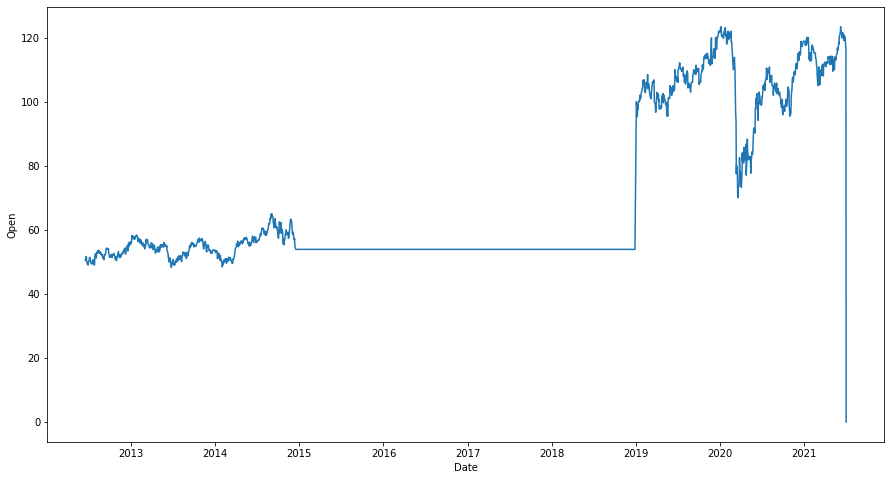

In [21]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data, x='Date', y='Open')

Observamos uma estranha linha entre 2015 e 2019, vamos investigar o que pode estar causando isso nos dados e depois voltamos a formatar o gráfico para deixá-lo mais específico.

In [24]:
data[(data['Date'] >= '2015-01-01') & (data['Date'] <= '2019-01-01')]

,Date,Open,High,Low,Close,Adj Close,Volume
629,2015-01-02,53.889999,53.889999,53.889999,53.889999,53.889999,0.0
630,2015-01-05,53.889999,53.889999,53.889999,53.889999,53.889999,0.0
631,2015-01-06,53.889999,53.889999,53.889999,53.889999,53.889999,0.0
632,2015-01-07,53.889999,53.889999,53.889999,53.889999,53.889999,0.0
633,2015-01-08,53.889999,53.889999,53.889999,53.889999,53.889999,0.0
...,...,...,...,...,...,...,...
1619,2018-12-20,53.889999,53.889999,53.889999,53.889999,53.889999,0.0
1620,2018-12-21,53.889999,53.889999,53.889999,53.889999,53.889999,0.0
1621,2018-12-26,53.889999,53.889999,53.889999,53.889999,53.889999,0.0
1622,2018-12-27,53.889999,53.889999,53.889999,53.889999,53.889999,0.0


###Aparentemente existe um erro de registros de praticamente 4 anos nas cotações de ECOO11, iremos tentar ler os dados com uma base do Google Finance agora.

##Leitura e exploração inicial dos dados de ECOO11 do Google Finance

In [25]:
dados = pd.read_csv('https://raw.githubusercontent.com/EnzoGolfetti/praticas_python/main/ECOO11_google_finance.csv', sep=',', decimal=',')
dados.head()

,Date,Open,High,Low,Close,Volume
0,15/06/2012 16:56:00,50.01,50.27,49.00,50.21,307770
1,19/06/2012 16:56:00,50.76,51.79,50.60,51.69,198900
2,20/06/2012 16:56:00,51.68,51.69,50.20,51.50,155510
3,21/06/2012 16:56:00,50.60,51.21,50.07,50.07,83580
4,22/06/2012 16:56:00,50.24,50.30,49.55,49.92,13170


In [26]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1983 non-null   object 
 1   Open    1983 non-null   float64
 2   High    1983 non-null   float64
 3   Low     1983 non-null   float64
 4   Close   1983 non-null   float64
 5   Volume  1983 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 93.1+ KB


In [28]:
#transformando a coluna Date em Datetime
dados['Date'] = pd.to_datetime(dados['Date'], yearfirst=True, format='%d/%m/%Y', exact=False)

In [29]:
dados.head()

,Date,Open,High,Low,Close,Volume
0,2012-06-15,50.01,50.27,49.00,50.21,307770
1,2012-06-19,50.76,51.79,50.60,51.69,198900
2,2012-06-20,51.68,51.69,50.20,51.50,155510
3,2012-06-21,50.60,51.21,50.07,50.07,83580
4,2012-06-22,50.24,50.30,49.55,49.92,13170


In [30]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1983 non-null   datetime64[ns]
 1   Open    1983 non-null   float64       
 2   High    1983 non-null   float64       
 3   Low     1983 non-null   float64       
 4   Close   1983 non-null   float64       
 5   Volume  1983 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 93.1 KB


In [31]:
dados.columns = dados.columns.str.lower()

###Nova preparação dos dados completa vamos partir para a análise e observar os primeiros dados graficamente novamente

Começando por abertura

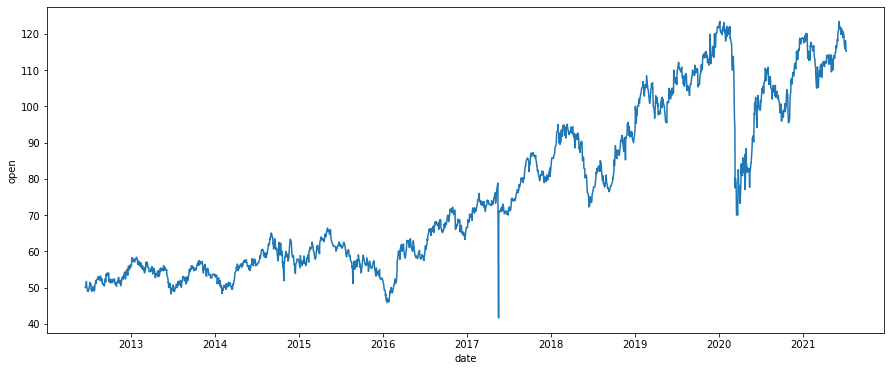

In [33]:
plt.figure(figsize=(15,6))
sns.lineplot(data=dados, x='date', y='open')

Novamente aparenta existir alguma falha nos dados entre 2017 e 2018, exploremos o que pode ser.

In [38]:
dados[(dados['date']>='2017-05-01') & (dados['date']<='2017-07-01')]

,date,open,high,low,close,volume
1082,2017-05-02,75.00,76.75,75.00,76.75,2100
1083,2017-05-03,76.16,76.36,76.16,76.36,600
1084,2017-05-04,75.36,75.38,75.36,75.38,1000
1085,2017-05-05,73.26,75.88,73.26,75.77,1520
1086,2017-05-09,76.38,76.38,76.36,76.36,500
1087,2017-05-10,77.00,77.45,77.00,77.45,80
1088,2017-05-15,78.81,78.81,78.80,78.80,20
1089,2017-05-18,41.62,71.49,41.62,70.67,1080
1090,2017-05-19,71.00,71.00,71.00,71.00,20
1091,2017-05-22,71.00,71.00,69.50,69.93,1110


Não aparenta ser um erro nos dados, mas sim, algo que realmente aconteceu, não é comum em pequenos espaços de tempo haver grandes variações nos dados, porém pode acontecer.

Vamos continuar portanto, observando nosso dados.

In [47]:
import matplotlib.ticker as ticker

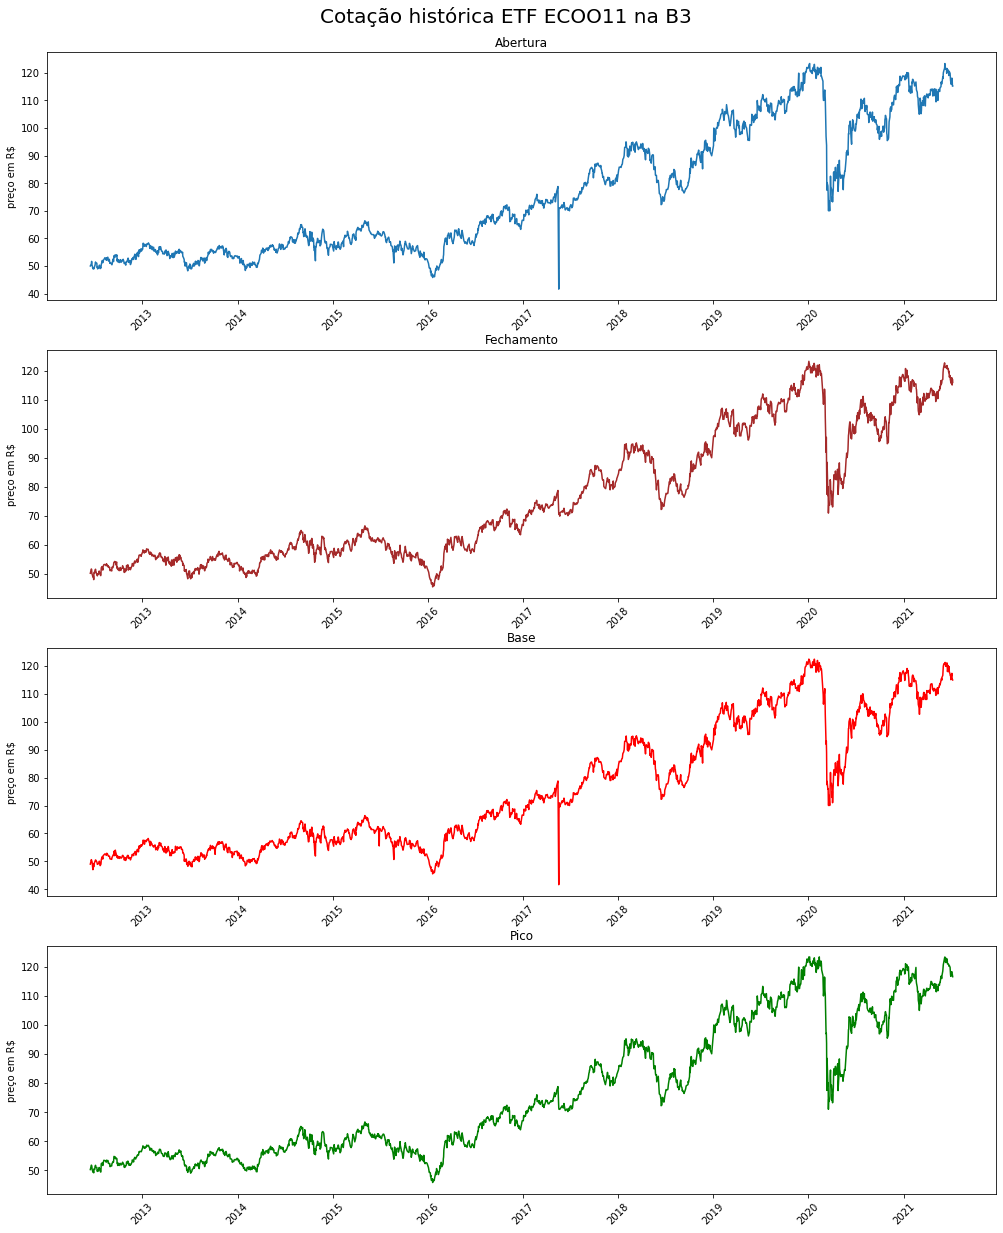

In [68]:
fig, axs = plt.subplots(4,1, figsize=(17,21))

sns.lineplot(data=dados, x='date', y='open', ax=axs[0])
axs[0].set_title('Abertura')
axs[0].set_xlabel(None)
axs[0].set_ylabel('preço em R$')
axs[0].tick_params('x', labelrotation=45,)

sns.lineplot(data=dados, x='date', y='close', ax=axs[1], color='brown')
axs[1].set_title('Fechamento')
axs[1].set_xlabel(None)
axs[1].set_ylabel('preço em R$')
axs[1].tick_params('x', labelrotation=45)

sns.lineplot(data=dados, x='date', y='low', ax=axs[2], color='red')
axs[2].set_title('Base')
axs[2].set_xlabel(None)
axs[2].set_ylabel('preço em R$')
axs[2].tick_params('x', labelrotation=45)

sns.lineplot(data=dados, x='date', y='high', ax=axs[3], color='green')
axs[3].set_title('Pico')
axs[3].set_xlabel(None)
axs[3].set_ylabel('preço em R$')
axs[3].tick_params('x', labelrotation=45)

plt.suptitle('Cotação histórica ETF ECOO11 na B3', y=0.91, fontsize=20)
plt.show()

Depois de analisar novamente os gráficos e pesquisar mais a fundo, identificamos que a queda de quase 50% no valor do ativo se deve ao dia seguinte do **Joesley Day** (17 de maio de 2017) em que de forma generalizada os preços da Bolsa de valores brasileira caíram.

O que mais salta os olhos nos gráficos é que apesar de ser um ativo que está se valorizando com a preocupação com o meio ambiente e a mudança climática, sofreu da mesma forma que os outros ativos brasileiros no 'crash' pandêmico, quando a bolsa brasileira sofreu 6 *break circut*.

##Desde o começo da pandemia, em todo o mundo começou grande corrida nos mercados por investimentos mais ambientais e sociais, conhecidos como ESG. O ECOO11 que existe desde 2012 tem essa pauta desde seu início, vamos observar mais de perto do ano de 2020 até agora e ver como está sendo sua recuperação.

In [70]:
dados_2020 = dados[dados['date']>='2020-01-01']

In [71]:
dados_2020.head()

,date,open,high,low,close,volume
1610,2020-01-02,122.00,122.78,122.00,122.78,4110
1611,2020-01-03,122.79,123.40,122.48,123.40,4390
1612,2020-01-06,123.40,123.40,121.84,121.95,190
1613,2020-01-07,121.20,121.51,121.20,121.37,690
1614,2020-01-08,120.68,121.75,120.68,121.45,270


In [77]:
#Vamos setar parâmetros padrões para a biblioteca Matplotlib para as visualizações serem construídas mais rápido
import matplotlib as mpl
#mpl.rcParams.keys()
mpl.rcParams['figure.figsize'] = (15,8)
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12

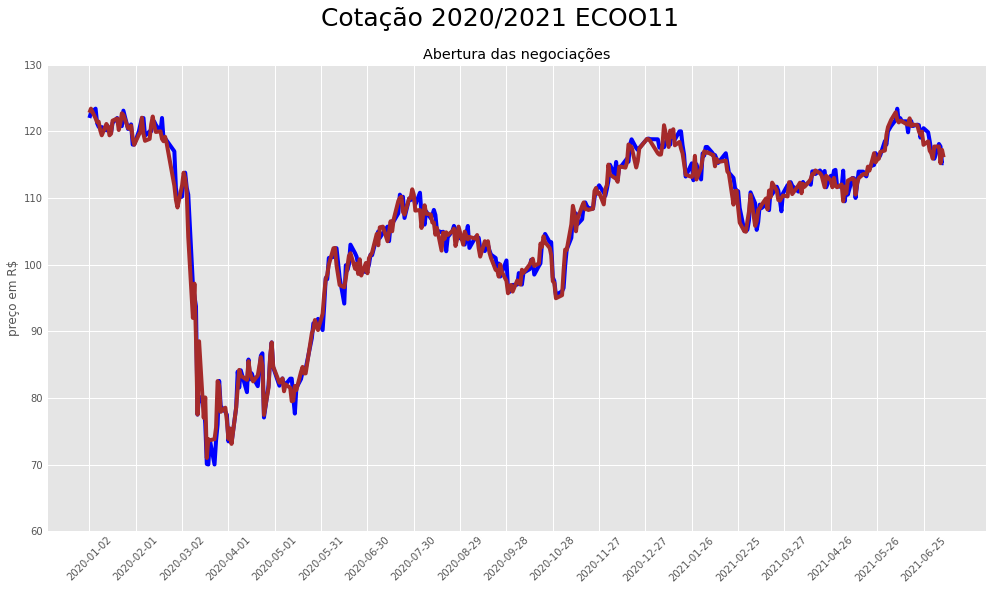

In [114]:
plt.style.use('ggplot')

ax = sns.lineplot(data=dados_2020, x='date', y='open', color='blue')
plt.plot('date', 'close', data=dados_2020, color='brown')

ax.set_xlabel(None)
ax.set_ylabel('preço em R$')
ax.set_title('Abertura das negociações')
plt.tick_params('x', labelrotation=45)
plt.ylim(60,130)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=30, offset=0))


sns.despine()
plt.suptitle('Cotação 2020/2021 ECOO11', fontsize=25)
plt.show()

Podemos observar que a cotação do ETF acompanha as fases da pandemia no Brasil, resumidamente:

- Março de 2020: Crash pandêmico;
- Novembro de 2020: Início segunda onda no Brasil;
- Março 2021: Pico segunda onda/ terceira onda no Brasil;
- Maio 2021 relaxamento da pandemia ao redor do mundo e do Brasil que valoriza os ativos em geral.

Próximos passos: Voltar lá em cima e plotar um histograma com a distribuição dos preços, analisar a seguinte pergunta: ESG está mais importante mesmo? Comparar com algum ETF que tenha petróleo com peso alto para comparar e comparar com algum outro setor descorrelacionado de clima, como Bancos e Tech (mas em Tech tem que fazer um adendo sobre alto crescimento durante a pandemia, o que deixa mais provocante ainda se o ESG cresceu mesmo), se não tiver ETF vamos de PETR4 (apesar de ela compor o índice ICO2).